In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [72]:
import pandas as pd

df = pd.read_csv("C:/Users/khush/Desktop/DS II/placementdata.csv")


print("Shape of dataset:", df.shape)
df.head()

# Basic info
df.info()
df.describe()
df.isnull().sum()


Shape of dataset: (10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [73]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le_target = LabelEncoder()
df["PlacementStatus"] = le_target.fit_transform(df["PlacementStatus"])

numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

X = df.drop("PlacementStatus", axis=1)
y = df["PlacementStatus"]

categorical_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [74]:
print(df.columns.tolist())



['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus']


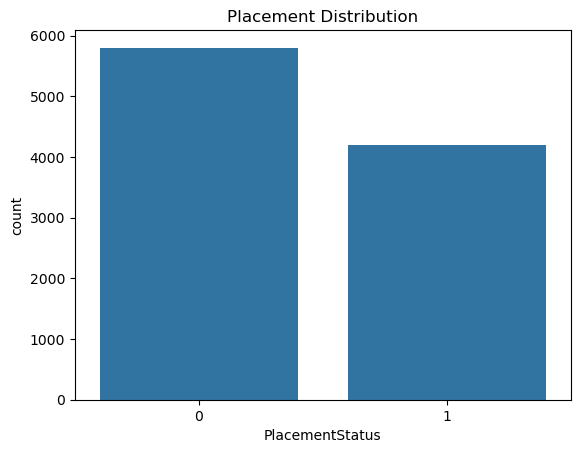

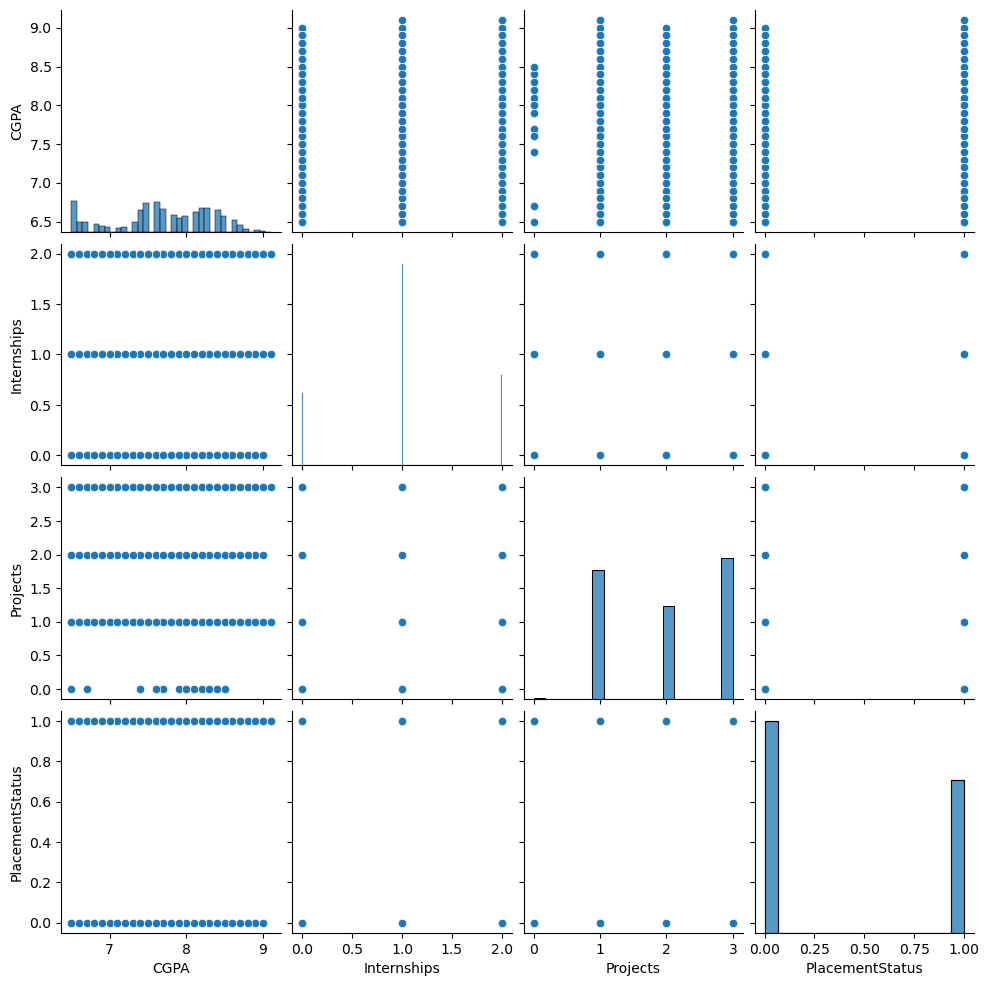

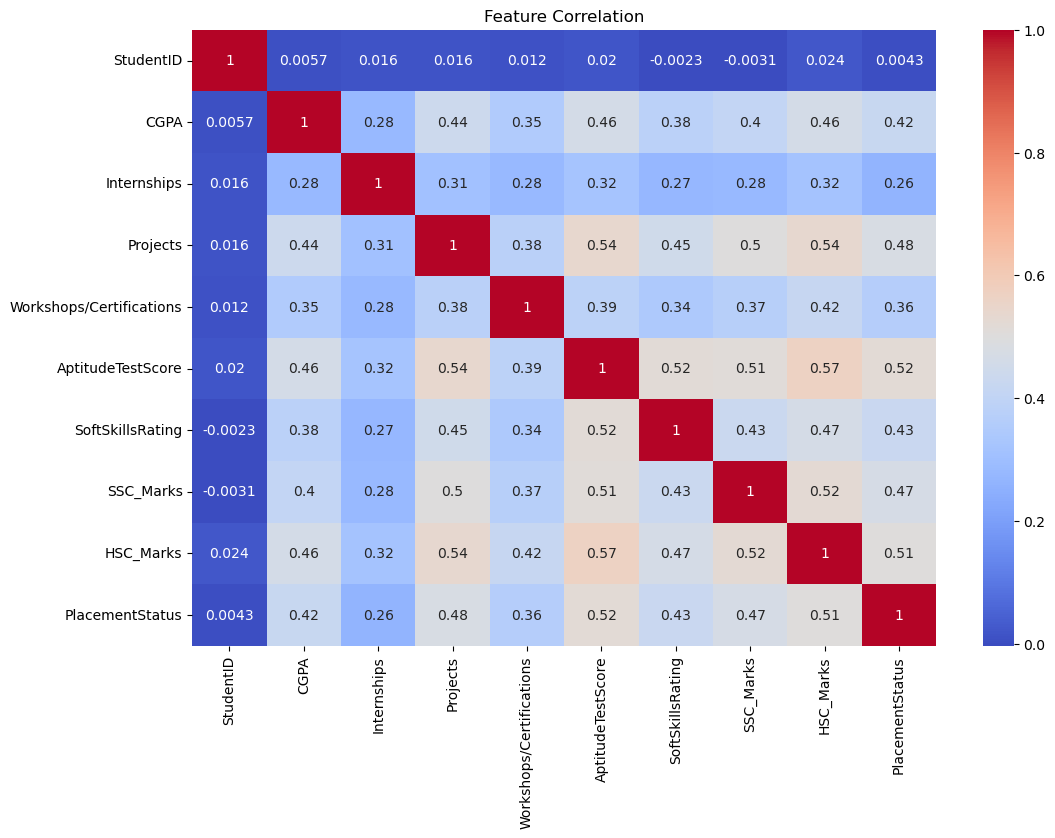

In [77]:
sns.countplot(x='PlacementStatus', data=df)
plt.title("Placement Distribution")
plt.show()


sns.pairplot(df[['CGPA','Internships','Projects','PlacementStatus']])
plt.show()

numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [23]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Training set:", X_train.shape, "Testing set:", X_test.shape)

Training set: (8000, 11) Testing set: (2000, 11)


In [28]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)

Logistic Regression Accuracy: 0.7935


In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 0.793


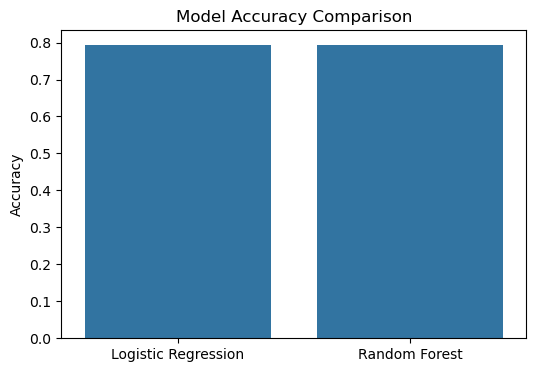

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Logistic Regression', 'Random Forest']
accuracy = [acc_lr, acc_rf]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracy)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [40]:
existing_cols = [col for col in numeric_cols if col in df.columns]
missing_cols = [col for col in numeric_cols if col not in df.columns]

print("Existing columns:", existing_cols)
print("Missing columns:", missing_cols)


Existing columns: ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks']
Missing columns: ['No_of_Projects', 'Internship']


In [41]:
for col in ['No_of_Projects', 'Internship']:
    if col not in df.columns:
        df[col] = 0


In [46]:
# Remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

# Now your numeric_cols can include all intended columns
numeric_cols = ['CGPA', 'No_of_Projects', 'Internship', 'AptitudeTestScore',
                'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining',
                'SSC_Marks', 'HSC_Marks']



for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df[numeric_cols] = df[numeric_cols].fillna(0)


scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [47]:
print(df.head())


   StudentID      CGPA  Internships  Projects  Workshops/Certifications  \
0          1  0.384615            1         1                         1   
1          2  0.923077            0         3                         2   
2          3  0.307692            1         2                         2   
3          4  0.384615            1         1                         2   
4          5  0.692308            1         2                         2   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0           0.166667          0.777778                        0.0   
1           1.000000          0.555556                        0.0   
2           0.733333          1.000000                        0.0   
3           0.833333          0.777778                        0.0   
4           0.866667          0.833333                        0.0   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  No_of_Projects  \
0                0.0   0.171429   0.709677             

In [ ]:
numeric_cols = ['CGPA', 'No_of_Projects', 'Internship', 'AptitudeTestScore',
                'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining',
                'SSC_Marks', 'HSC_Marks']

categorical_cols = ['Gender', 'Degree', 'Stream']  

target_col = 'Placed'

In [54]:
print(df.columns.tolist())


['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus', 'No_of_Projects', 'Internship']


In [55]:
df.columns = df.columns.str.strip()


In [56]:
categorical_cols = [] 


In [64]:
X = df[numeric_cols]  # numeric features only
y = df['PlacementStatus']      # target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
new_candidate_dict = {
    'CGPA': 8.5,
    'No_of_Projects': 2,
    'Internship': 3,
    'AptitudeTestScore': 1,
    'SoftSkillsRating': 4,
    'ExtracurricularActivities': 10,
    'PlacementTraining': 1,
    'SSC_Marks': 85,
    'HSC_Marks': 90
}

new_df = pd.DataFrame([new_candidate_dict])

#Scale candidate
new_df[numeric_cols] = scaler.transform(new_df[numeric_cols])

#Predict placement
prediction = rf.predict(new_df[numeric_cols].to_numpy())
print("Placement Prediction:", "Placed" if prediction[0] == 1 else "Not Placed")

Placement Prediction: Placed
